- You can also find the above dataset in the github repository of the text book 
  The file ToyotaCorolla.csv contains data on used cars (Toyota Corollas) on sale during late summer of 2004 in the Netherlands.   It has 1436 records containing details on 38 attributes, including Price, Age, Kilometers, HP, and other specifications. The goal will be to predict the price of a used Toyota Corolla based on its specifications.

> **Question 1:** 
- **Import the data into your jupyter notebook.**
- **Reorder the column names so that the 'object' features appear first in the data (Model, Fuel_Type, Color).**


In [47]:
# import necessary libraries
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn import preprocessing

In [48]:
# Import the data
import pandas as pd

toyota_corolla= pd.read_csv(r"C:\\Users\\91958\\Documents\\SEM3\\Datamining_670CB\\dmba\\ToyotaCorolla.csv")

In [49]:
toyota_corolla.head(2)

,Id,Model,Price,Age_08_04,Mfg_Month,Mfg_Year,KM,Fuel_Type,HP,Met_Color,...,Powered_Windows,Power_Steering,Radio,Mistlamps,Sport_Model,Backseat_Divider,Metallic_Rim,Radio_cassette,Parking_Assistant,Tow_Bar
0,1,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13500,23,10,2002,46986,Diesel,90,1,...,1,1,0,0,0,1,0,0,0,0
1,2,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13750,23,10,2002,72937,Diesel,90,1,...,0,1,0,0,0,1,0,0,0,0


In [50]:
# Reorder the columns so that the 'object' features appear first in the data (Model, Fuel_Type, Color).

obj_cols= toyota_corolla.select_dtypes('object').columns.tolist()
num_cols= toyota_corolla.select_dtypes(exclude='object').columns.tolist()
toyota_corolla= toyota_corolla[obj_cols+num_cols]

In [51]:
toyota_corolla.head(2)

,Model,Fuel_Type,Color,Id,Price,Age_08_04,Mfg_Month,Mfg_Year,KM,HP,...,Powered_Windows,Power_Steering,Radio,Mistlamps,Sport_Model,Backseat_Divider,Metallic_Rim,Radio_cassette,Parking_Assistant,Tow_Bar
0,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,Diesel,Blue,1,13500,23,10,2002,46986,90,...,1,1,0,0,0,1,0,0,0,0
1,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,Diesel,Silver,2,13750,23,10,2002,72937,90,...,0,1,0,0,0,1,0,0,0,0


In [52]:
toyota_corolla.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1436 entries, 0 to 1435
Data columns (total 39 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Model              1436 non-null   object
 1   Fuel_Type          1436 non-null   object
 2   Color              1436 non-null   object
 3   Id                 1436 non-null   int64 
 4   Price              1436 non-null   int64 
 5   Age_08_04          1436 non-null   int64 
 6   Mfg_Month          1436 non-null   int64 
 7   Mfg_Year           1436 non-null   int64 
 8   KM                 1436 non-null   int64 
 9   HP                 1436 non-null   int64 
 10  Met_Color          1436 non-null   int64 
 11  Automatic          1436 non-null   int64 
 12  CC                 1436 non-null   int64 
 13  Doors              1436 non-null   int64 
 14  Cylinders          1436 non-null   int64 
 15  Gears              1436 non-null   int64 
 16  Quarterly_Tax      1436 non-null   int64 


In [53]:
var= list(toyota_corolla.columns)
var

['Model',
 'Fuel_Type',
 'Color',
 'Id',
 'Price',
 'Age_08_04',
 'Mfg_Month',
 'Mfg_Year',
 'KM',
 'HP',
 'Met_Color',
 'Automatic',
 'CC',
 'Doors',
 'Cylinders',
 'Gears',
 'Quarterly_Tax',
 'Weight',
 'Mfr_Guarantee',
 'BOVAG_Guarantee',
 'Guarantee_Period',
 'ABS',
 'Airbag_1',
 'Airbag_2',
 'Airco',
 'Automatic_airco',
 'Boardcomputer',
 'CD_Player',
 'Central_Lock',
 'Powered_Windows',
 'Power_Steering',
 'Radio',
 'Mistlamps',
 'Sport_Model',
 'Backseat_Divider',
 'Metallic_Rim',
 'Radio_cassette',
 'Parking_Assistant',
 'Tow_Bar']

In [54]:
# Remove the 'Id' variable

var.remove('Id')
toyota_corolla = toyota_corolla[var]

# remove all three categorical variables
var.remove('Model')
var.remove('Fuel_Type')
var.remove('Color')

In [55]:
toyota_corolla.columns

Index(['Model', 'Fuel_Type', 'Color', 'Price', 'Age_08_04', 'Mfg_Month',
       'Mfg_Year', 'KM', 'HP', 'Met_Color', 'Automatic', 'CC', 'Doors',
       'Cylinders', 'Gears', 'Quarterly_Tax', 'Weight', 'Mfr_Guarantee',
       'BOVAG_Guarantee', 'Guarantee_Period', 'ABS', 'Airbag_1', 'Airbag_2',
       'Airco', 'Automatic_airco', 'Boardcomputer', 'CD_Player',
       'Central_Lock', 'Powered_Windows', 'Power_Steering', 'Radio',
       'Mistlamps', 'Sport_Model', 'Backseat_Divider', 'Metallic_Rim',
       'Radio_cassette', 'Parking_Assistant', 'Tow_Bar'],
      dtype='object')

In [56]:
toyota_corolla.head(1)

,Model,Fuel_Type,Color,Price,Age_08_04,Mfg_Month,Mfg_Year,KM,HP,Met_Color,...,Powered_Windows,Power_Steering,Radio,Mistlamps,Sport_Model,Backseat_Divider,Metallic_Rim,Radio_cassette,Parking_Assistant,Tow_Bar
0,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,Diesel,Blue,13500,23,10,2002,46986,90,1,...,1,1,0,0,0,1,0,0,0,0


In [57]:
# Extract the numeric columns

numeric_cols = toyota_corolla.select_dtypes(include=['int64', 'float64']).columns
all_numeric_df = toyota_corolla[numeric_cols]

In [58]:
all_numeric_df = toyota_corolla[var]
all_numeric_df.head(2)

,Price,Age_08_04,Mfg_Month,Mfg_Year,KM,HP,Met_Color,Automatic,CC,Doors,...,Powered_Windows,Power_Steering,Radio,Mistlamps,Sport_Model,Backseat_Divider,Metallic_Rim,Radio_cassette,Parking_Assistant,Tow_Bar
0,13500,23,10,2002,46986,90,1,0,2000,3,...,1,1,0,0,0,1,0,0,0,0
1,13750,23,10,2002,72937,90,1,0,2000,3,...,0,1,0,0,0,1,0,0,0,0


In [59]:
# Drop missing values 

all_numeric_df = all_numeric_df.dropna(how='any')
all_numeric_df.shape

(1436, 35)

In [60]:
toyota_corolla.shape

(1436, 38)

> **Question 2**
- **What is multicolinearity and what challenges does it pose for Machine Learning model development?** 
- **Create a correlation heatmap and explain whether there is a multicollinearity issue with these data.**
- **Your heatmap should include information about correlation values.** 
- **Can you drop variables with overlapping information systematically using these correlation values?** 

##### What is multicolinearity and what challenges does it pose for Machine Learning model development?
- Multicollinearity simply implies that one or more of the features in your dataset are useless to the model.
- Two features said to be multicollinear if two features are highly correlated/dependent. 
- Changes in one feature result in changes in another feature.

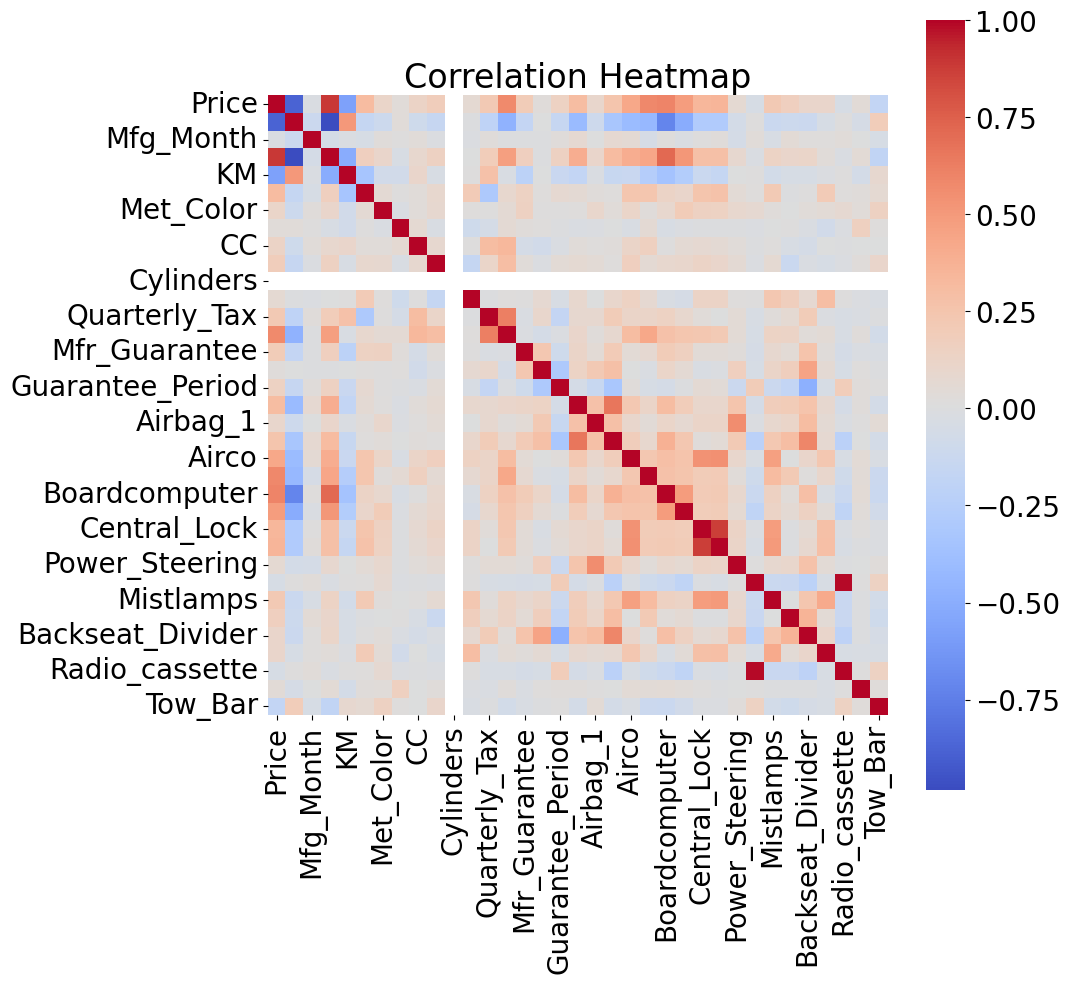

In [61]:
import seaborn as sns
import matplotlib.pyplot as plt

# Compute the correlation matrix
correlation_matrix = toyota_corolla.corr()

# Create a heatmap
plt.figure(figsize=(10, 10))
sns.heatmap(correlation_matrix, cmap='coolwarm', square=True)
plt.title('Correlation Heatmap')

# Display the plot
plt.show()

In [62]:
# Correlation values to find multi-collinearity

print(correlation_matrix)

                      Price  Age_08_04  Mfg_Month  Mfg_Year        KM  \
Price              1.000000  -0.876590  -0.018138  0.885159 -0.569960   
Age_08_04         -0.876590   1.000000  -0.123255 -0.983661  0.505672   
Mfg_Month         -0.018138  -0.123255   1.000000 -0.057416 -0.020630   
Mfg_Year           0.885159  -0.983661  -0.057416  1.000000 -0.504974   
KM                -0.569960   0.505672  -0.020630 -0.504974  1.000000   
HP                 0.314990  -0.156622  -0.039312  0.164697 -0.333538   
Met_Color          0.108905  -0.108150   0.030266  0.103310 -0.080503   
Automatic          0.033081   0.031717   0.009146 -0.033567 -0.081854   
CC                 0.126389  -0.098084   0.037387  0.091892  0.102683   
Doors              0.185326  -0.148359  -0.012069  0.151442 -0.036197   
Cylinders               NaN        NaN        NaN       NaN       NaN   
Gears              0.063104  -0.005364  -0.013063  0.007766  0.015023   
Quarterly_Tax      0.219197  -0.198431   0.031373  

In [63]:
threshold = 0.8

# Loop through the correlation matrix and identify highly correlated variables
multicollinear_vars = set()
n_variables = correlation_matrix.shape[0]

for i in range(n_variables):
    for j in range(i+1, n_variables):
        if abs(correlation_matrix.iloc[i, j]) > threshold:
            variable_i = correlation_matrix.index[i]
            variable_j = correlation_matrix.columns[j]
            multicollinear_vars.add((variable_i, variable_j))

In [64]:
multicollinear_vars

{('Age_08_04', 'Mfg_Year'),
 ('Central_Lock', 'Powered_Windows'),
 ('Price', 'Age_08_04'),
 ('Price', 'Mfg_Year'),
 ('Radio', 'Radio_cassette')}

- Yes, there is multi-collinearity issue with the data.
- The highly correlated variables from the dataset are: 
    - ('Age_08_04', 'Mfg_Year'),
    - ('Central_Lock', 'Powered_Windows'),
    - ('Price', 'Age_08_04'),
    - ('Price', 'Mfg_Year'),
    - ('Radio', 'Radio_cassette')

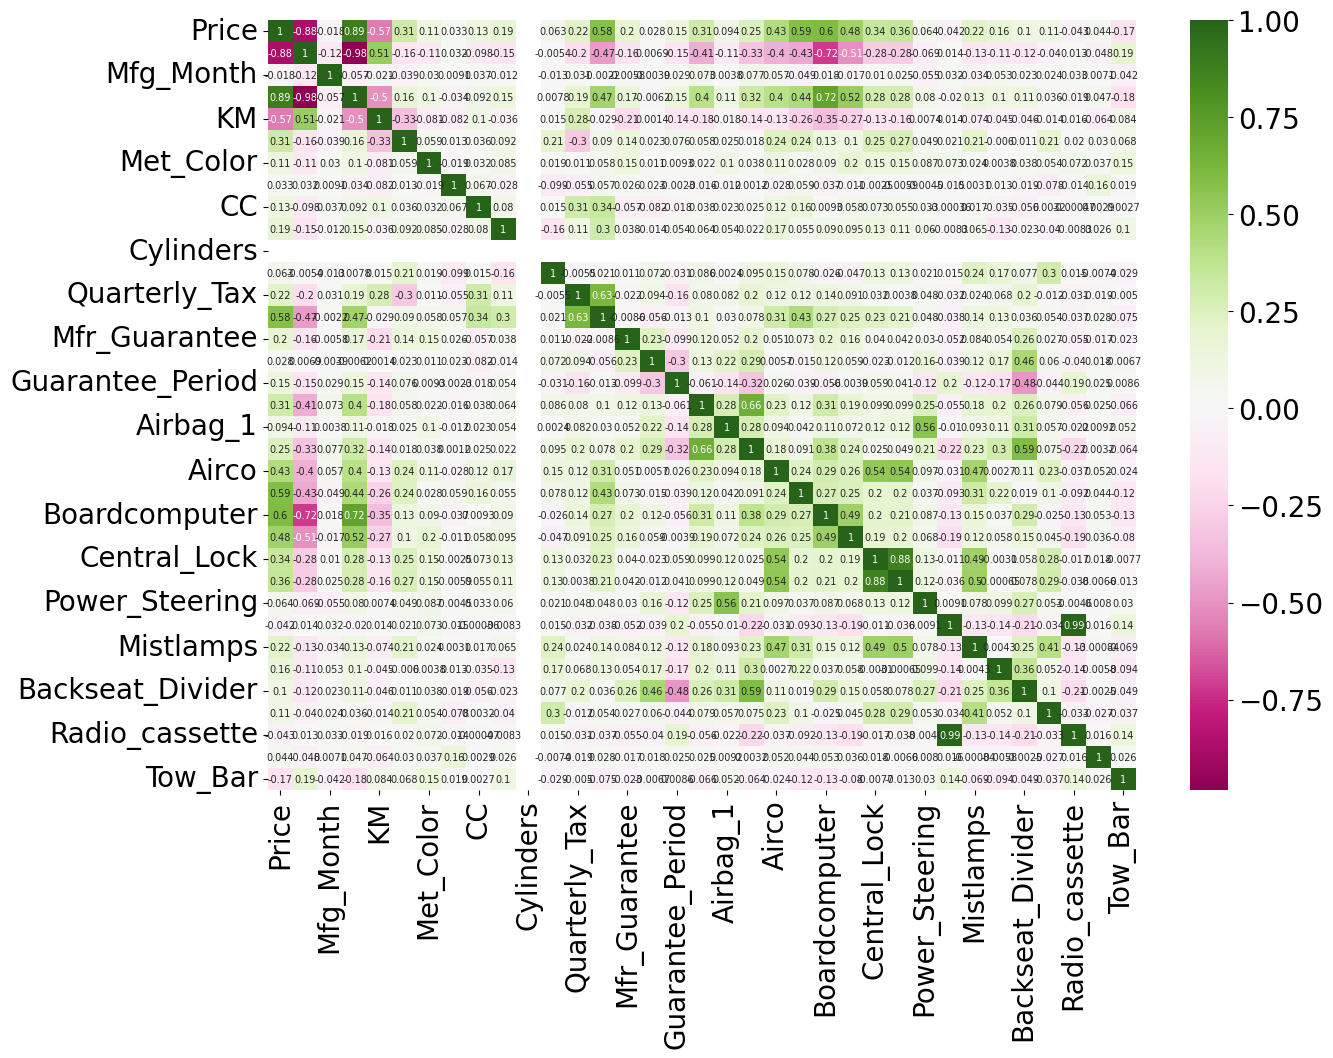

In [65]:
# Your heatmap should include information about correlation values.
correlation_matrix = np.round(toyota_corolla.corr(), 2)

plt.figure(figsize=(14, 10))
sns.heatmap(toyota_corolla.corr(), cmap="PiYG", annot=True, annot_kws={'size': 7})
plt.show()

- Can you drop variables with overlapping information systematically using these correlation values?
     - from the heatmap we can see that:
     - Mfg_Year and Price are correlated, but Price is the dependent variable, so we can't drop Mfg_Year
     - Powered_Windows and Central_Lock are strongly correlated, so we will get rid of one of them.
     - Also Radio_cassette and Radio, we will drop one of them.
     - We see that the correlation between Age_08_04 and Mfg_Year is strong but negative, so we can also drop one of them.
     
- Yes, this will make the dataset much better for analysis and more accurate when training ML models.

> **Question 3:
  We focus first on two variables: price and kilometers(KM).**

- **Calculate the average values of Price and KM**
- **Calculate the variances of Price and KM**
- **Calculate the Variance-Covariance matrix between Price and KM and point out the variance and covariance values** 
- **How much of the total variance is made up by Price and how much by KM?** 
- **Can we drop one of the variables for the sake of dimension reduction?**

In [66]:
# Calculate the average values of Price and KM

avg_price = toyota_corolla.Price.mean()
avg_km = toyota_corolla.KM.mean()
print('Mean of the Price: ', avg_price)
print('Mean of the KM: ', avg_km)

Mean of the Price:  10730.824512534818
Mean of the KM:  68533.25974930362


In [67]:
# Calculate the variances of Price and KM

var_price = toyota_corolla.Price.var()
var_km = toyota_corolla.KM.var()
print('Variance of the Price: ', var_price)
print('Variance of the KM: ', var_km)

Variance of the Price:  13154872.100193106
Variance of the KM:  1406733707.0021696


In [68]:
# Calculate the Variance-Covariance matrix between Price and KM and point out the variance and covariance values

cov_price_km = toyota_corolla.Price.cov(toyota_corolla.KM)
print('Covariance of Price-KM: ', cov_price_km)

Covariance of Price-KM:  -77534281.20595342


In [69]:
# variance and covariance matrix

toyota_corolla[['Price', 'KM']].cov()

,Price,KM
Price,1.315487e+07,-7.753428e+07
KM,-7.753428e+07,1.406734e+09


In [70]:
# How much of the total variance is made up by Price and how much by KM?

total_variance = var_price + var_km
print('The total Variance made by Price and KM is:', total_variance)

The total Variance made by Price and KM is: 1419888579.1023626


In [71]:
price_portion = var_price / total_variance * 100
KM_portion = var_km / total_variance * 100
print(f'The total variance is made up by {price_portion}% of Price, and {KM_portion}% of KM.')

The total variance is made up by 0.9264721397019381% of Price, and 99.07352786029807% of KM.


- Can we drop one of the variables for the sake of dimension reduction?

  - Looking at the portions from the previous block, we see that KM is explaining the variability in the dataset
    much more better than Price, however, we would drop the price variable for the sake of dimension reduction,
  - But as it is the dependent variable, we will not drop it

> **Question 4:**
- **What is the correlation between Price and KM? Can we use this correlation information to reduce the number of variables, while making maximum use of their unique contributions to the overall variation?**

In [72]:
# What is the correlation between Price and KM?

corr_price_km  = toyota_corolla.Price.corr(toyota_corolla.KM)
print('Correlation of price-km: ', corr_price_km)

Correlation of price-km:  -0.5699601645337193


- Can we use this correlation information to reduce the number of variables, while making maximum use of their unique contributions to the overall variation?

  - 56% of total variation of Price and KM is covariation
  - That is 56% are overlapping information. 
  - So one variable is good enough and can retain pretty much more info from the original   data.

- We can apply the PCA, the principal components analysis for that.

> **Question 5:** 
- **Conduct a principal components analysis on all the columns of the cleaned data and answer the following:**
- **How many principal components account for most of the variation in the original data?**
- **Does it help to reduce dimensions in the data?** 
- **How does it help with the multicolinearity problem as well?** 
- **Should the data be normalized?** 


- Conduct a principal components analysis on all the columns of the cleaned data and answer the following:
  - Principal Component Analysis: 
              
        - Finding the number of principal components
        - Finding if it helps reducing the dimensions in the data
        - Finding weather it help with multi-collinearity problem

In [73]:
# How many principal components account for most of the variation in the original data?

from sklearn.decomposition import PCA

# pcs - principal component scores
pcs = PCA(n_components = 2)
pcs.fit(toyota_corolla[['Price', 'KM']])

PCA(n_components=2)

In [74]:
pcs.components_

array([[-0.05538053,  0.99846532],
       [ 0.99846532,  0.05538053]])

In [75]:
# calculating the dataframe

pcsComponents = pd.DataFrame(pcs.components_.transpose(), columns=['PC1_weight', 'PC2_weight'],
                            index = ['Price', 'KM'])
pcsComponents

,PC1_weight,PC2_weight
Price,-0.055381,0.998465
KM,0.998465,0.055381


- PC Weights represent the contribution of each original variable to the construction of the principal components and reflect the correlation between the variables and the principal components.
- It gives insights into:
  - Magnitude of the weigts-indicates the strength of the relationship between a variable and a principal component.
  - Positive and negative weights-shows how the variable contributes to the direction of the principal component. 
  - Importance of variables-Variables with higher absolute weights contribute more to the formation of the principal component and are considered more important in representing the underlying variability in the data.
  - Feature Selection-By identifying variables with high weights in a specific principal component, we can focus on those variables and potentially discard others.

In [76]:
pcsSummary = pd.DataFrame({'Standard Deviation': np.sqrt(pcs.explained_variance_),
                          'Proportion of variance': pcs.explained_variance_ratio_,
                          'Cumulative proportion': np.cumsum(pcs.explained_variance_ratio_)})
pcsSummary = pcsSummary.transpose() # transposing the data
pcsSummary.columns = ['PC1', 'PC2']
pcsSummary.round(4)

,PC1,PC2
Standard Deviation,37563.7351,2975.6315
Proportion of variance,0.9938,0.0062
Cumulative proportion,0.9938,1.0000


- 99% variance is retained by PC1
- Almost 0%, that is almost nothing has been retained by PC2

In [77]:
scores = pd.DataFrame(pcs.transform(toyota_corolla[['Price', 'KM']]),
                     columns = ['PC1', 'PC2'])
scores.head()

,PC1,PC2
0,-21667.550017,1571.627133
1,4229.778400,3258.423470
2,-26959.375822,1728.804258
3,-20735.407943,3075.557701
4,-30154.371863,1351.284327


Scores= Original Data * PC

The PC scores represent the transformed values of each observation along the principal components. In this case, the first column (PC1) represents the scores along the first principal component, and the second column (PC2) represents the scores along the second principal component.

The PC scores allow us to understand how each observation contributes to the overall variation captured by the principal components.

- PC scores, can be used to reduce the dimensionality of the dataset. By retaining only a subset of the most important principal components (based on their variance explained or cumulative variance), we can represent the data with fewer dimensions while preserving a significant amount of information.

In [78]:
scores.shape

(1436, 2)

The number of columns in the scores matrix would be equal to the number of retained principal components.

In [79]:
pcs.explained_variance_

array([1.41103420e+09, 8.85438302e+06])

Explained variance is a measure of how much of the total variation in the original data is accounted for by each principal component.

- First principal component explains approximately 99.38% of the total variance in the data, while the second principal component explains approximately 0.62% of the total variance.

In [80]:
toyota_corolla.head(2)

,Model,Fuel_Type,Color,Price,Age_08_04,Mfg_Month,Mfg_Year,KM,HP,Met_Color,...,Powered_Windows,Power_Steering,Radio,Mistlamps,Sport_Model,Backseat_Divider,Metallic_Rim,Radio_cassette,Parking_Assistant,Tow_Bar
0,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,Diesel,Blue,13500,23,10,2002,46986,90,1,...,1,1,0,0,0,1,0,0,0,0
1,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,Diesel,Silver,13750,23,10,2002,72937,90,1,...,0,1,0,0,0,1,0,0,0,0


In [81]:
pcs = PCA()
pcs.fit(toyota_corolla.iloc[:, 3:].dropna(axis=0))
pcsSummary_df = pd.DataFrame({'Standard Deviation': np.sqrt(pcs.explained_variance_),
                          'Proportion of variance': pcs.explained_variance_ratio_,
                          'Cumulative proportion': np.cumsum(pcs.explained_variance_ratio_)})
pcsSummary_df = pcsSummary_df.transpose() # transposing the data
pcsSummary_df.columns = ['PC{}'.format(i) for i in range(1, len(pcsSummary_df.columns)+1)]
pcsSummary_df.round(4)

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,...,PC26,PC27,PC28,PC29,PC30,PC31,PC32,PC33,PC34,PC35
Standard Deviation,37563.7632,2977.5116,411.1664,43.4244,25.7158,12.8047,8.3998,3.1896,2.9184,0.9141,...,0.2027,0.1735,0.1717,0.1644,0.1543,0.1025,0.0515,0.0317,0.0,0.0
Proportion of variance,0.9936,0.0062,0.0001,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,...,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0,0.0
Cumulative proportion,0.9936,0.9999,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,...,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0,1.0


- cum var = 99 (PC3) it means we cld almost retain 99% with just 1 Principal Components. 
- So all other PCs after that, we can neglect them.

- Does it help to reduce dimensions in the data?

  - var= 99%(PC1)- we have retained 99 with just 1 components.
  - that helps with overfitting

In [82]:
pcsComponents_df = pd.DataFrame(pcs.components_.transpose(),
                               columns = pcsSummary_df.columns,
                               index=toyota_corolla.iloc[:, 3:].columns)
pcsComponents_df.iloc[:, :5]

,PC1,PC2,PC3,PC4,PC5
Price,-5.538025e-02,9.978265e-01,-3.305314e-02,-1.223164e-02,-3.025887e-03
Age_08_04,2.519420e-04,-4.458892e-03,6.722833e-04,9.405556e-03,6.261267e-02
Mfg_Month,-1.827715e-06,-4.082195e-05,4.038586e-04,3.094602e-03,-6.272913e-03
Mfg_Year,-2.084286e-05,3.749761e-04,-8.967849e-05,-1.041680e-03,-4.694980e-03
KM,9.984646e-01,5.530699e-02,-2.987362e-03,-8.188948e-04,9.960421e-05
HP,-1.332854e-04,7.580381e-04,1.304477e-03,-7.753918e-02,2.399509e-01
Met_Color,-1.008479e-06,1.203230e-05,2.642509e-05,-6.086169e-05,1.229063e-04
Automatic,-4.995148e-07,-1.271381e-06,4.551032e-05,1.198722e-04,1.013311e-03
CC,1.149051e-03,3.277247e-02,9.989929e-01,-3.032782e-02,-2.906935e-03
Doors,-9.403021e-07,6.414923e-05,9.117797e-05,3.387020e-03,7.041223e-03


- How does it help with the multicolinearity problem as well?

- by removing the strongly correlated independent variables in the dataset.

In [83]:
# Should the data be normalized?
# Yes, it should be normalized, in order to avoid bias when there are variables with larger scales, for example KM and Weight.

all_numeric_df

,Price,Age_08_04,Mfg_Month,Mfg_Year,KM,HP,Met_Color,Automatic,CC,Doors,...,Powered_Windows,Power_Steering,Radio,Mistlamps,Sport_Model,Backseat_Divider,Metallic_Rim,Radio_cassette,Parking_Assistant,Tow_Bar
0,13500,23,10,2002,46986,90,1,0,2000,3,...,1,1,0,0,0,1,0,0,0,0
1,13750,23,10,2002,72937,90,1,0,2000,3,...,0,1,0,0,0,1,0,0,0,0
2,13950,24,9,2002,41711,90,1,0,2000,3,...,0,1,0,0,0,1,0,0,0,0
3,14950,26,7,2002,48000,90,0,0,2000,3,...,0,1,0,0,0,1,0,0,0,0
4,13750,30,3,2002,38500,90,0,0,2000,3,...,1,1,0,1,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1431,7500,69,12,1998,20544,86,1,0,1300,3,...,1,1,0,1,1,1,0,0,0,0
1432,10845,72,9,1998,19000,86,0,0,1300,3,...,0,1,0,0,1,1,0,0,0,0
1433,8500,71,10,1998,17016,86,0,0,1300,3,...,0,1,0,0,0,1,0,0,0,0
1434,7250,70,11,1998,16916,86,1,0,1300,3,...,0,0,0,0,0,1,0,0,0,0


In [84]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
normalized_data = scaler.fit_transform(all_numeric_df)

In [85]:
import numpy as np
from sklearn.decomposition import PCA
from sklearn import preprocessing

# PCA after normalization
pcs = PCA()
pcs.fit(preprocessing.scale(normalized_data))

# view the importance of principal components
pcsSummary_df = pd.DataFrame({'Standard deviation': np.sqrt(pcs.explained_variance_),
                              'Proportion of variance': pcs.explained_variance_ratio_,
                              'Cumulative proportion': np.cumsum(pcs.explained_variance_ratio_)
                             })
pcsSummary_df = pcsSummary_df.transpose()
pcsSummary_df.columns = ['PC{}'.format(i) for i in range(1, pcsSummary_df.shape[1]+1)]
pcsSummary_df.round(4)

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,...,PC26,PC27,PC28,PC29,PC30,PC31,PC32,PC33,PC34,PC35
Standard deviation,2.4967,1.7499,1.5797,1.4291,1.4201,1.2257,1.1399,1.1151,1.0750,1.0344,...,0.6510,0.5336,0.4790,0.4563,0.4176,0.3490,0.2655,0.0898,0.0,0.0
Proportion of variance,0.1832,0.0900,0.0733,0.0600,0.0593,0.0442,0.0382,0.0365,0.0340,0.0314,...,0.0125,0.0084,0.0067,0.0061,0.0051,0.0036,0.0021,0.0002,0.0,0.0
Cumulative proportion,0.1832,0.2732,0.3466,0.4066,0.4659,0.5100,0.5482,0.5848,0.6187,0.6502,...,0.9678,0.9761,0.9829,0.9890,0.9941,0.9977,0.9998,1.0000,1.0,1.0


In [86]:
# Components
print('\nComponents')
pcsComponents_df = pd.DataFrame(pcs.components_.transpose(), columns=pcsSummary_df.columns)

# Print the components DataFrame
print(pcsComponents_df)


Components
             PC1       PC2       PC3           PC4           PC5       PC6  \
0   3.501637e-01  0.155657 -0.133820 -2.158667e-02  2.012500e-02 -0.083758   
1  -3.408757e-01 -0.132601  0.216467  6.457934e-02  2.783042e-02  0.051051   
2   1.112124e-02 -0.006539 -0.016879 -5.025380e-03 -5.423196e-02 -0.089935   
3   3.409106e-01  0.134586 -0.214708 -6.405652e-02 -1.815961e-02 -0.035043   
4  -1.898152e-01 -0.127983  0.111019  3.795196e-01 -1.381383e-01 -0.010560   
5   1.267029e-01  0.119575  0.207741 -2.288275e-01  9.457048e-02 -0.028086   
6   6.985538e-02  0.038433  0.063850 -6.923287e-02 -1.437807e-01  0.245213   
7  -6.924080e-04  0.012741 -0.037686 -9.083732e-03  3.125211e-02  0.085730   
8   6.024512e-02  0.060251 -0.026791  3.568104e-01 -1.138344e-01 -0.034352   
9   8.285461e-02  0.090725 -0.016499  1.496965e-01 -9.755551e-02  0.370691   
10  1.654361e-24 -0.000000 -0.000000  2.775558e-17 -3.469447e-17  0.000000   
11  5.134760e-02 -0.047253  0.246475 -3.733794e-02  

- Yes, it should be normalised.
    - Because the different variables are measured on different scales, we must first normalize the data, otherwise the variables with the largest scale will dominate the principal components. 
    - From the non-standardized output we see that the first component account for over 99% of the total variability (and the first 6 components accounts for over 99% and above of the total variability). 
    
    - When we standardize the data, those numbers drop to 18%, 27% and 34% and so on.

> **Question 6:**
- **Visualize the first 2 PCs using sample of 50 observations**

In [87]:
pip install adjustText

Note: you may need to restart the kernel to use updated packages.


In [88]:
from adjustText import adjust_text

toyota_corolla_plot = toyota_corolla.dropna(axis=0)
toyota_corolla_plot = toyota_corolla.reset_index(drop=True)

scores = pd.DataFrame(pcs.fit_transform(preprocessing.scale(toyota_corolla_plot.iloc[:, 3:].dropna(axis=0))),
                     columns= [f'PC{i}' for i in range(1, 36)])
toyota_corolla_pca = pd.concat([toyota_corolla_plot['Model'].dropna(axis=0),
                        scores[['PC1', 'PC2']]], axis=1)

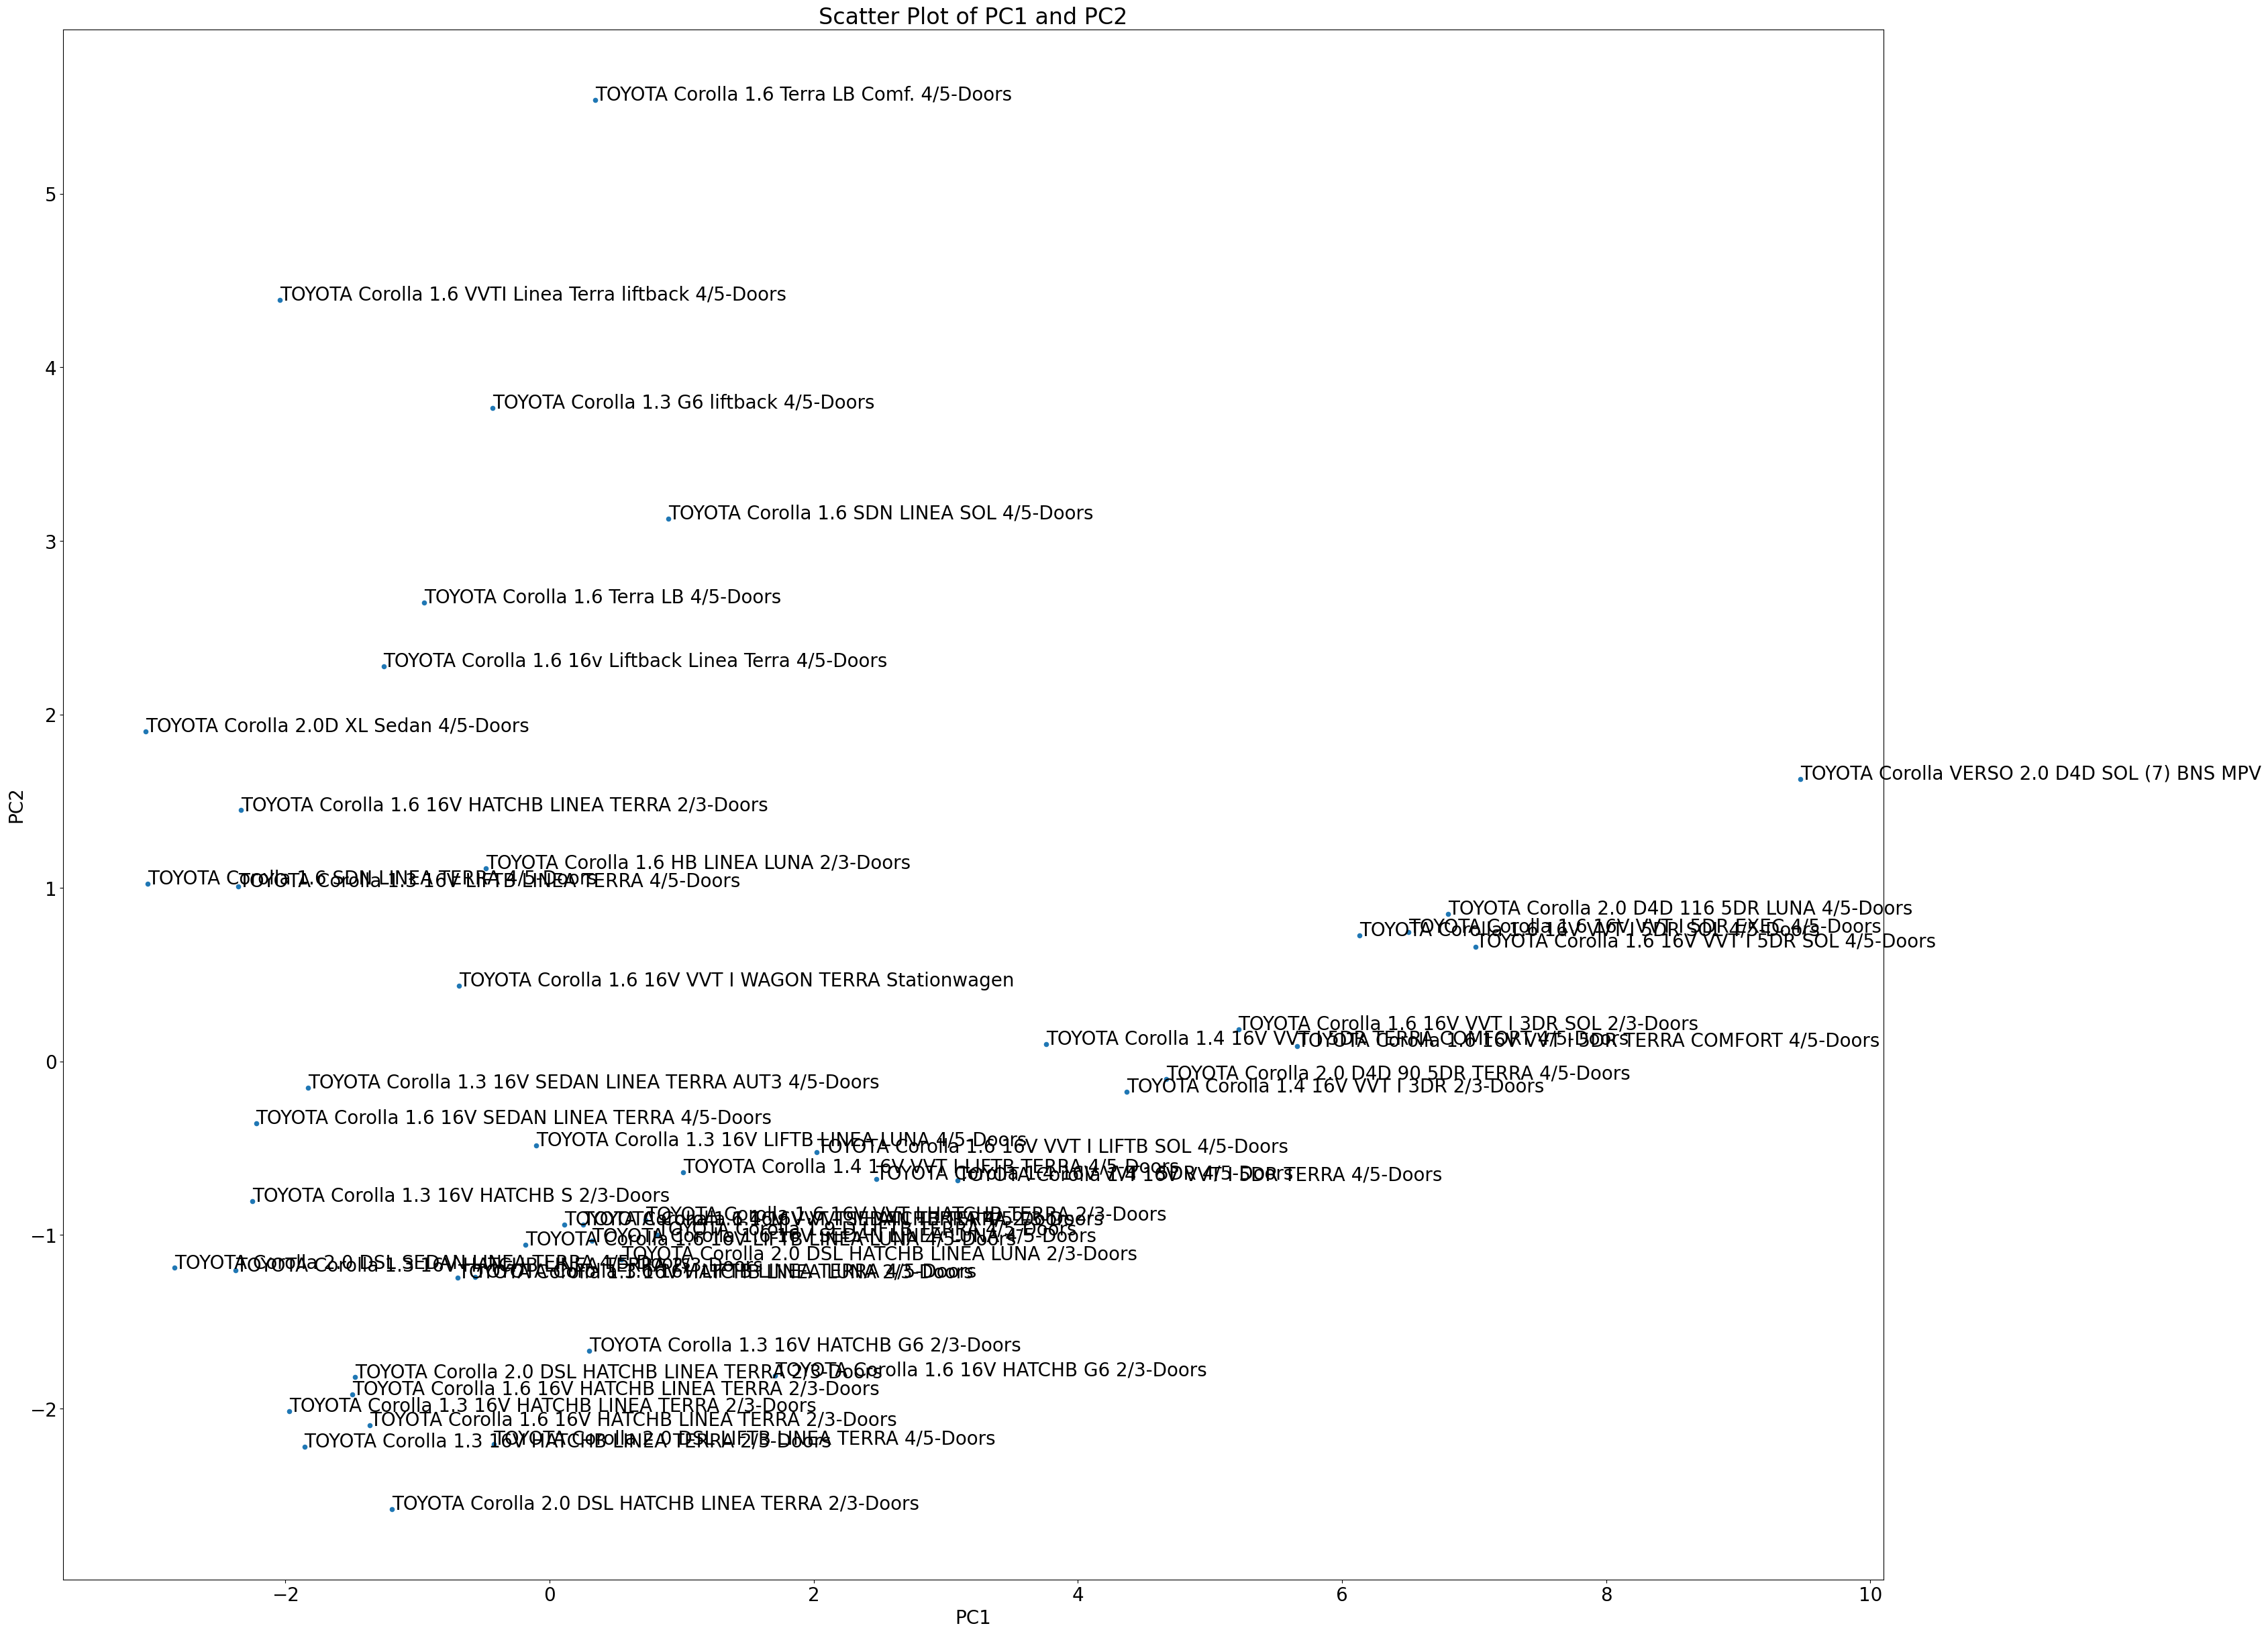

In [89]:
# Visualize the first 2 PCs using sample of 50 observations

import matplotlib.pyplot as plt
import matplotlib

# Increase the font size for better visibility
matplotlib.rcParams.update({'font.size': 20})

# Select a sample of 50 observations for visualization
sampled_data = toyota_corolla_pca.sample(50)

# Create a scatter plot of PC1 and PC2
ax = sampled_data.plot.scatter(x='PC1', y='PC2', figsize=(35, 30))

# Add labels to the data points
for i, point in sampled_data.iterrows():
    ax.annotate(point['Model'], (point['PC1'], point['PC2']))

# Set plot title and axis labels
ax.set_title('Scatter Plot of PC1 and PC2')
ax.set_xlabel('PC1')
ax.set_ylabel('PC2')

# Show the plot
plt.show()

In [44]:
# Here is the 50 sample observation for PC1 and PC2 for the Model variable. 